In [1]:
%load_ext autoreload
%load_ext autotime

time: 215 µs (started: 2024-03-24 21:47:31 -07:00)


In [2]:
import os
import sys
wisio_dir = os.path.abspath("../")
sys.path.append(wisio_dir)
import warnings
warnings.filterwarnings('ignore')

time: 771 µs (started: 2024-03-24 21:47:31 -07:00)


In [3]:
import dask
import dask.dataframe as dd
import numpy as np
import pandas as pd
print('pandas', pd.__version__)
print('dask', dask.__version__)
print('numpy', np.__version__)

pandas 2.1.2
dask 2023.9.3
numpy 1.24.3
time: 2.05 s (started: 2024-03-24 21:47:31 -07:00)


In [4]:
trace_path = '/usr/workspace/iopp/wisio_logs/recorder_cm1_32_4/_parquet'

time: 615 µs (started: 2024-03-24 21:47:33 -07:00)


In [5]:
%autoreload 2

from wisio.cluster_management import load_cluster_config
from wisio.recorder import RecorderAnalyzer

cluster_config = load_cluster_config('cluster_config_local.yml')
cluster_config.local_dir = '/var/tmp/wisio-recorder-cm1'

analyzer = RecorderAnalyzer(
    checkpoint=False,
    checkpoint_dir='/usr/workspace/iopp/wisio_logs/_checkpoints/recorder_cm1_32_4',
    cluster_config=cluster_config,
    working_dir='.wisio/recorder_cm1_32_4_local',
    debug=True,
    verbose=False,
)

analyzer.cluster_manager.client.dashboard_link

[INFO] [21:47:35] Initializing Recorder analyzer [/g/g91/izzet/projects/wisio/wisio/analyzer.py:110]
[DEBUG] [21:47:35] Using selector: EpollSelector [/collab/usr/gapps/python/build/spack-toss4.1/var/spack/environments/python/._view/75prb56irmif5ejtirjthpx6kq3gqo52/lib/python3.9/asyncio/selector_events.py:54]
[DEBUG] [21:47:37] Client dashboard at http://127.0.0.1:8787/status [/g/g91/izzet/projects/wisio/wisio/cluster_management.py:43]


'http://127.0.0.1:8787/status'

time: 4.52 s (started: 2024-03-24 21:47:33 -07:00)


In [6]:
%autoreload 2

# analyzer.cluster_manager.client.restart()

all_result = analyzer.analyze_parquet(
    trace_path=trace_path,
    # logical_view_types=True,
    metrics=['iops'],
    # view_types=['file_name'],
    # slope_threshold=15,
)

# result.output.console(show_debug=True, max_bottlenecks=100)

[INFO] [21:47:40] Read traces (0.3972654289100319) [/g/g91/izzet/projects/wisio/wisio/recorder.py:78]
[INFO] [21:47:43] Compute high-level metrics (2.7071653769817203) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:150]
[INFO] [21:47:44] Compute main view (1.4323182189837098) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:165]
[INFO] [21:47:45] Compute metric boundaries (0.05923167895525694) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:182]
[INFO] [21:47:49] Compute perspectives (4.1455820039846) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:203]
[INFO] [21:47:50] Detect I/O bottlenecks (1.0454099290072918) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:213]
[INFO] [21:47:58] Attach reasons to I/O bottlenecks (8.720186616992578) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:228]
[DEBUG] [21:47:59] Save I/O bottlenecks (0.34594796784222126) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:231]


time: 18.9 s (started: 2024-03-24 21:47:40 -07:00)


In [7]:
all_result.output.sqlite('CM1')

time: 2.78 s (started: 2024-03-24 21:48:08 -07:00)


In [9]:
all_result.output.console(compact=True, max_bottlenecks=1, root_only=True, show_debug=True)

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│                                                                                                                 │
│  Runtime          667.81 s                                                                                      │
│  I/O Time         4.12 s - R: 0.05% - W: 14.08% - M: 85.89%                                                     │
│  I/O Operations   27.5K ops - R: 4.67% - W: 8.39% - M: 86.95%                                                   │
│  I/O Size         21.18 GiB - R: 94.59% - W: 5.41%                                                              │
│  Read Requests    4 MiB-16 MiB                                                                                  │
│  Write Requests   4 kiB-16 MiB                                                                                  │
│  Nodes            1 node                                                                                        │
│  Apps             1 app                                                                                         │
│  Processes/Ranks  1,280 processes                                                                               │
│  Files            775 files - Shared: 4.90% - FPP: 95.10%                                                       │
│  Time Periods     393 time periods                                                                              │
│  Access Pattern   Sequential: 100.00% - Random: 0.00%                                                           │
│                                                                                                                 │
╰─ R: Read - W: Write - M: Metadata  ─────────────────────────────────────────────────────────────────────────────╯
                                                                                                                   
╭────────────────────────────────────── 75 I/O Bottlenecks with 176 Reasons ──────────────────────────────────────╮
│                                                                                                                 │
│  File View (28 bottlenecks with 75 reasons)                                                                     │
│  ├── [CR1] 7 processes access 7 files within 7 time periods across 6 I/O operations and have an I/O time of     │
│  │   0.07 seconds which is 1.67% of overall I/O time of the workload.                                           │
│  │   ├── [Excessive metadata access] Overall 99.86% (0.07 seconds) of I/O time is spent on metadata access,     │
│  │   │   specifically 99.79% (0.07 seconds) on the 'open' operation.                                            │
│  │   ├── [Operation imbalance] 'write' operations are 16.67% (1 operations) of total I/O operations.            │
│  │   └── [Size imbalance] 'write' size is 100.00% (47.26 kiB) of total I/O size.                                │
│  └── (27 more)                                                                                                  │
│  Process View (24 bottlenecks with 48 reasons)                                                                  │
│  ├── [CR29] 1 process (app1#localhost#600#35184372411024) accesses 38 files within 18 time periods across 162   │
│  │   I/O operations and has an I/O time of 3.44 seconds which is 83.66% of overall I/O time of the workload.    │
│  │   ├── [Excessive metadata access] Overall 100.00% (3.44 seconds) of I/O time is spent on metadata access,    │
│  │   │   specifically 99.98% (3.44 seconds) on the 'open' operation.                                            │
│  │   └── [Size imbalance] 'read' size is 100.00% (16.00 MiB) of total I/O size.                                 │
│  └── (23 more)                                                                                                  │
│  Time Period View (23 bottlenecks with 53 reasons)    

time: 2.53 s (started: 2024-03-24 21:51:43 -07:00)


In [38]:
ddf = dd.read_parquet(all_result.bottleneck_dir)
ddf

,view_name,iops_score,subject,time,count,size_min,size_max,size,read_time,write_time,metadata_time,read_size,write_size,metadata_size,read_count,write_count,metadata_count,read_min,read_max,write_min,write_max,metadata_min,metadata_max,data_count,data_size,data_time,sequential_time,random_time,sequential_size,random_size,sequential_count,random_count,close_time,open_time,seek_time,stat_time,close_count,open_count,seek_count,stat_count,time_per,count_per,iops_slope,iops_bin,time_overall,num_proc_name,num_time_range,num_file_name,metric,view_depth,excessive_metadata_access,excessive_metadata_access.reason.0,excessive_metadata_access.reason.1,excessive_metadata_access.reason.2,operation_imbalance,operation_imbalance.reason.0,operation_imbalance.reason.1,random_operations,random_operations.reason.0,size_imbalance,size_imbalance.reason.0,size_imbalance.reason.1,small_reads,small_reads.reason.0,small_reads.reason.1,small_writes,small_writes.reason.0,small_writes.reason.1,behavior
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,string,string,string,float64,int64,int64,int64,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,string,int64,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,bool,float64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


time: 130 ms (started: 2024-03-24 20:31:22 -07:00)


In [44]:
from pandas.api.types import is_numeric_dtype

agg_dict = {col: 'mean' if is_numeric_dtype(ddf[col]) else 'first' for col in ddf.columns}
for agg_key in agg_dict.copy():
    if 'num_' in agg_key:
        agg_dict[agg_key] = 'sum'
agg_dict['behavior'] = 'count'
agg_dict

{'view_name': 'first',
 'iops_score': 'first',
 'subject': 'first',
 'time': 'mean',
 'count': 'mean',
 'size_min': 'mean',
 'size_max': 'mean',
 'size': 'mean',
 'read_time': 'mean',
 'write_time': 'mean',
 'metadata_time': 'mean',
 'read_size': 'mean',
 'write_size': 'mean',
 'metadata_size': 'mean',
 'read_count': 'mean',
 'write_count': 'mean',
 'metadata_count': 'mean',
 'read_min': 'mean',
 'read_max': 'mean',
 'write_min': 'mean',
 'write_max': 'mean',
 'metadata_min': 'mean',
 'metadata_max': 'mean',
 'data_count': 'mean',
 'data_size': 'mean',
 'data_time': 'mean',
 'sequential_time': 'mean',
 'random_time': 'mean',
 'sequential_size': 'mean',
 'random_size': 'mean',
 'sequential_count': 'mean',
 'random_count': 'mean',
 'close_time': 'mean',
 'open_time': 'mean',
 'seek_time': 'mean',
 'stat_time': 'mean',
 'close_count': 'mean',
 'open_count': 'mean',
 'seek_count': 'mean',
 'stat_count': 'mean',
 'time_per': 'mean',
 'count_per': 'mean',
 'iops_slope': 'mean',
 'iops_bin': 

time: 32.5 ms (started: 2024-03-24 20:35:59 -07:00)


In [46]:
groupb = ddf.groupby(['view_name', 'iops_score', 'behavior']).agg(agg_dict).compute()
groupb

view_name  \
view_name                      iops_score behavior                                   
file_name                      critical   1.0                            file_name   
                                          5.0                            file_name   
                                          3.0                            file_name   
                                          2.0                            file_name   
                                          4.0                            file_name   
...                                                                            ...   
time_range.proc_name.file_name medium     1.0       time_range.proc_name.file_name   
                                          2.0       time_range.proc_name.file_name   
                                          3.0       time_range.proc_name.file_name   
                               low        1.0       time_range.proc_name.file_name   
                                          2.0       time_range.proc_name.file_name   

                                                   iops_score  \
view_name                      iops_score behavior              
file_name                      critical   1.0        critical   
                                          5.0        critical   
                                          3.0        critical   
                                          2.0        critical   
                                          4.0        critical   
...                                                       ...   
time_range.proc_name.file_name medium     1.0          medium   
                                          2.0          medium   
                                          3.0          medium   
                               low        1.0             low   
                                          2.0             low   

                                                                                              subject  \
view_name                      iops_score behavior                                                      
file_name                      critical   1.0       /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...   
                                          5.0       /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...   
                                          3.0       /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...   
                                          2.0       /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...   
                                          4.0       /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...   
...                                                                                               ...   
time_range.proc_name.file_name medium     1.0       /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...   
                                          2.0       /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...   
                                          3.0       /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...   
                               low        1.0       /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...   
                                          2.0       /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...   

                                                        time  count  \
view_name                      iops_score behavior                    
file_name                      critical   1.0       0.068905    6.0   
                                          5.0       2.191869  162.0   
                                          3.0       0.030335    6.0   
                                          2.0       0.019950    6.0   
                                          4.0       0.020914    8.0   
...                                                      ...    ...   
time_range.proc_name.file_name medium     1.0       0.191971  124.0   
                                          2.0       0.239706  155.0   
                                

time: 446 ms (started: 2024-03-24 20:36:26 -07:00)


In [11]:
df = dd.read_parquet(all_result.bottleneck_dir).compute()
df

,view_name,iops_score,subject,time,count,size_min,size_max,size,read_time,write_time,...,size_imbalance,size_imbalance.reason.0,size_imbalance.reason.1,small_reads,small_reads.reason.0,small_reads.reason.1,small_writes,small_writes.reason.0,small_writes.reason.1,behavior
0,file_name,critical,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,0.325141,6,49340,49340,49340,0.0,0.000113,...,True,False,True,False,False,True,False,False,True,1.0
1,file_name,critical,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,2.191869,162,0,16777216,44564480,0.0,0.006853,...,True,False,True,False,False,True,False,False,True,5.0
2,file_name,critical,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,0.031704,6,49340,49340,49340,0.0,0.000101,...,True,False,True,False,False,True,False,False,True,1.0
3,file_name,critical,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,0.030335,6,0,47144,47144,0.0,0.000066,...,True,False,True,False,False,True,False,False,True,3.0
4,file_name,critical,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,0.029139,6,49340,49340,49340,0.0,0.000137,...,True,False,True,False,False,True,False,False,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,time_range.proc_name.file_name,medium,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,0.191971,124,0,0,0,0.0,0.000000,...,False,False,False,False,False,True,False,False,True,1.0
3,time_range.proc_name.file_name,medium,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,0.239706,155,0,0,0,0.0,0.000000,...,False,False,False,False,False,True,False,False,True,2.0
4,time_range.proc_name.file_name,medium,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,0.159938,134,0,0,0,0.0,0.000000,...,False,False,False,False,False,True,False,False,True,3.0
5,time_range.proc_name.file_name,low,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,0.167812,144,0,0,0,0.0,0.000000,...,False,False,False,False,False,True,False,False,True,1.0


time: 141 ms (started: 2024-03-24 20:10:37 -07:00)


In [28]:
from pandas.api.types import is_numeric_dtype

agg_dict = {col: 'mean' if is_numeric_dtype(file_name_critical[col]) else 'first' for col in file_name_critical.columns}
agg_dict['behavior'] = 'count'

time: 2.56 ms (started: 2024-03-24 20:18:13 -07:00)


In [32]:
result = file_name_critical.groupby('behavior').agg(agg_dict)
result

,view_name,iops_score,subject,time,count,size_min,size_max,size,read_time,write_time,...,size_imbalance,size_imbalance.reason.0,size_imbalance.reason.1,small_reads,small_reads.reason.0,small_reads.reason.1,small_writes,small_writes.reason.0,small_writes.reason.1,behavior
behavior,,,,,,,,,,,,,,,,,,,,,
1.0,file_name,critical,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,0.068905,6.0,48398.857143,4.839886e+04,4.839886e+04,0.0,0.000098,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,7
2.0,file_name,critical,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,0.019950,6.0,49340.000000,4.934000e+04,4.934000e+04,0.0,0.000127,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3.0,file_name,critical,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,0.030335,6.0,0.000000,4.714400e+04,4.714400e+04,0.0,0.000066,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
4.0,file_name,critical,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,0.020914,8.0,0.000000,1.228540e+05,1.228540e+05,0.0,0.000129,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
5.0,file_name,critical,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,2.191869,162.0,0.000000,1.677722e+07,4.456448e+07,0.0,0.006853,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1


time: 60.8 ms (started: 2024-03-24 20:19:42 -07:00)


In [36]:
from wisio.rules import BottleneckRule

bot = result.iloc[0]

bot.num_file_name

all_result.bottleneck_rules['excessive_metadata_access'].describe_bottleneck(
    metric='iops',
    compact=True,
    num_files=bot.num_file_name,
    num_ops=bot['count'],
    num_processes=bot.num_proc_name,
    num_time_periods=bot.num_time_range,
    subject=bot.subject,
    time=bot.time,
    time_overall = 0,
    view_type='file_name',
)

'1.0 processes access 1.0 files (cm1out_diag_000342_s.dat) within 1.0 time periods across 6.0 I/O operations and have an I/O time of 0.07 seconds which is 0.00% of overall I/O time of the workload.'

time: 5.7 ms (started: 2024-03-24 20:22:14 -07:00)


In [91]:
view_df = df.set_index(['view_name', 'iops_score'])
view_df

subject  \
view_name                      iops_score                                                      
file_name                      critical    /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...   
                               critical    /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...   
                               critical    /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...   
                               critical    /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...   
                               critical    /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...   
...                                                                                      ...   
time_range.proc_name.file_name medium      /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...   
                               medium      /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...   
                               medium      /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...   
                               low         /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...   
                               low         /p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...   

                                               time  count  size_min  \
view_name                      iops_score                              
file_name                      critical    0.325141      6     49340   
                               critical    2.191869    162         0   
                               critical    0.031704      6     49340   
                               critical    0.030335      6         0   
                               critical    0.029139      6     49340   
...                                             ...    ...       ...   
time_range.proc_name.file_name medium      0.191971    124         0   
                               medium      0.239706    155         0   
                               medium      0.159938    134         0   
                               low         0.167812    144         0   
                               low         0.164900    155         0   

                                           size_max      size  read_time  \
view_name                      iops_score                                  
file_name                      critical       49340     49340        0.0   
                               critical    16777216  44564480        0.0   
                               critical       49340     49340        0.0   
                               critical       47144     47144        0.0   
                               critical       49340     49340        0.0   
...                                             ...       ...        ...   
time_range.proc_name.file_name medium             0         0        0.0   
                               medium             0         0        0.0   
                               medium             0         0        0.0   
                               low                0         0        0.0   
                               low                0         0        0.0   

                                           write_time  metadata_time  \
view_name                      iops_score                              
file_name                      critical      0.000113       0.325028   
                               critical      0.006853       2.191869   
                               critical      0.000101       0.031603   
                               critical      0.000066       0.030269   
                               critical      0.000137       0.029001   
...                                               ...            ...   
time_range.proc_name.file_name medium        0.000000       0.191971   
                               medium        0.000000       0.239706   
                               medium        0.000000       0.159938   
                               low           0.000000       0.167812   
                               low           0

time: 41.2 ms (started: 2024-03-24 17:58:36 -07:00)


In [8]:
view_names = list(df['view_name'].unique())
scores = list(df['iops_score'].unique())

NameError: name 'df' is not defined

time: 26.6 ms (started: 2024-03-24 20:01:21 -07:00)


In [93]:
df['view_name'].value_counts()

view_name
file_name                         63
proc_name                         31
file_name.proc_name               31
time_range.proc_name              31
file_name.time_range.proc_name    31
time_range.file_name.proc_name    31
time_range                        24
file_name.time_range              17
time_range.file_name              14
proc_name.file_name                8
time_range.proc_name.file_name     7
proc_name.time_range               2
file_name.proc_name.time_range     2
proc_name.file_name.time_range     2
proc_name.time_range.file_name     1
Name: count, dtype: int64[pyarrow]

time: 11.3 ms (started: 2024-03-24 17:58:37 -07:00)


In [490]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.preprocessing import StandardScaler

for view_name, score in it.product(view_names, scores):

    if not (view_name, score) in view_df.index:
        continue

    view_score_bot = view_df.loc[(view_name, score)]

    # print(view_name, score)

    view_df.loc[(view_name, score), 'behavior2'] = -1  # Default behavior

    if len(view_score_bot) > 1:

        cols = view_df.columns

        # TODO make this generic
        behavior_cols = cols[cols.str.contains(
            '_min|_max|_count|_size|_time|excessive_|small_|_imbalance|_bin') & ~cols.str.contains('num_')]

        scaler = StandardScaler()
        scaled_behavior = scaler.fit_transform(view_score_bot[behavior_cols])

        link_mat = linkage(scaled_behavior, method='weighted')
        clusters = fcluster(link_mat, t=1, criterion='distance')

        view_df.loc[(view_name, score), 'behavior2'] = clusters

    # break

# view_df

time: 270 ms (started: 2024-03-24 18:48:41 -07:00)


In [491]:
# view_df.loc['file_name', 'critical']['behavior2'].value_counts()

time: 713 µs (started: 2024-03-24 18:48:42 -07:00)


In [492]:
view_df.loc['time_range', 'critical'].reset_index().sort_values('behavior2')[['behavior2', 'iops_score', *behavior_cols]].T.head(10)

,0,3,1,2
behavior2,1.0,2.0,3.0,4.0
iops_score,critical,critical,critical,critical
size_min,0,0,5530,0
size_max,0,19856,93024,65552
read_time,0.0,0.0,0.0,0.0
write_time,0.0,0.000109,0.002122,0.003499
metadata_time,2.191843,0.031797,0.325979,0.151844
read_size,0,0,0,0
write_size,0,5802,130255,6465
metadata_size,0,19584,92752,65360


time: 16.1 ms (started: 2024-03-24 18:48:42 -07:00)


In [493]:
view_df.loc['file_name', 'critical'].reset_index().sort_values('behavior2')[['behavior2', 'iops_score', *behavior_cols]].T.head(10)

,0,2,4,5,6,7,8,9,3,10,1
behavior2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,4.0,5.0
iops_score,critical,critical,critical,critical,critical,critical,critical,critical,critical,critical,critical
size_min,49340,49340,49340,47144,47144,47144,49340,49340,0,0,0
size_max,49340,49340,49340,47144,47144,47144,49340,49340,47144,122854,16777216
read_time,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
write_time,0.000113,0.000101,0.000137,0.000083,0.000091,0.000062,0.000102,0.000127,0.000066,0.000129,0.006853
metadata_time,0.325028,0.031603,0.029001,0.026304,0.024835,0.023002,0.021869,0.019823,0.030269,0.020785,2.191869
read_size,0,0,0,0,0,0,0,0,0,0,0
write_size,49340,49340,49340,47144,47144,47144,49340,49340,47144,122854,44564480
metadata_size,0,0,0,0,0,0,0,0,0,0,0


time: 20 ms (started: 2024-03-24 18:48:43 -07:00)


In [494]:
view_df.loc['proc_name', 'critical'].reset_index().sort_values('behavior2')[['behavior2', 'iops_score', *behavior_cols]].T.head(20)

,2,4,0,3,1
behavior2,1.0,2.0,3.0,4.0,5.0
iops_score,critical,critical,critical,critical,critical
size_min,0,0,0,0,0
size_max,16777216,16777216,16777216,16777216,16777216
read_time,0.00001,0.00001,0.00001,0.00001,0.000011
write_time,0.0,0.0,0.0,0.0,0.0
metadata_time,3.285678,3.256688,3.442531,3.23942,3.331725
read_size,16777216,16777216,16777216,16777216,16777216
write_size,0,0,0,0,0
metadata_size,0,0,0,0,0


time: 17.3 ms (started: 2024-03-24 18:48:45 -07:00)


In [156]:
view_df.query('behavior2 in [6,13,20,7]').T

view_name,file_name,file_name,file_name,file_name,file_name,file_name,file_name,file_name,file_name,file_name,file_name,file_name
subject,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...
time,0.023064,0.021971,0.01995,0.239706,0.228154,0.159938,0.005574,0.004952,0.004139,0.004131,0.004059,0.003986
count,6,6,6,163,156,141,6,6,6,6,6,6
size_min,47144,49340,49340,0,0,0,49340,49340,47144,47144,47144,47144
size_max,47144,49340,49340,16777216,16777216,16777216,49340,49340,47144,47144,47144,47144
...,...,...,...,...,...,...,...,...,...,...,...,...
small_writes,False,False,False,False,False,False,False,False,False,False,False,False
small_writes.reason.0,False,False,False,False,False,False,False,False,False,False,False,False
small_writes.reason.1,True,True,True,True,True,True,True,True,True,True,True,True
behavior,1,1,1,1,1,1,1,1,1,1,1,1


time: 27.4 ms (started: 2024-03-24 17:00:06 -07:00)


In [33]:
df['behavior'].value_counts()

behavior
1     29
2     18
7     15
8     15
4     15
5     15
3     14
9     13
11    13
10    12
6     11
13    11
17     9
18     8
12     8
14     8
16     8
15     8
20     7
19     7
21     6
22     6
23     5
24     4
41     2
26     2
40     2
37     1
33     1
27     1
35     1
31     1
30     1
39     1
34     1
50     1
29     1
47     1
28     1
38     1
49     1
36     1
48     1
51     1
25     1
46     1
42     1
44     1
43     1
45     1
32     1
Name: count, dtype: int64

time: 5.17 ms (started: 2024-03-24 14:55:27 -07:00)


In [9]:
ddf

NameError: name 'ddf' is not defined

time: 25.4 ms (started: 2024-03-24 20:42:56 -07:00)


In [34]:
len(df['behavior'].unique())

51

time: 3.62 ms (started: 2024-03-24 14:55:30 -07:00)


In [35]:
df.query('behavior == 1').T

,15,48,0,4,13,14,3,5,10,11,...,1,1,4,0,1,0,23,24,1,2
subject,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,app1#localhost#600#35184372411024,app1#localhost#360#35184372411024,129,450,app1#localhost#720#35184372411024,app1#localhost#200#35184372411024,60,199,...,449,app1#localhost#840#35184372411024,app1#localhost#880#35184372411024,5,449,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,app1#localhost#640#35184372411024,app1#localhost#160#35184372411024,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...
time,0.167812,0.053557,3.442541,3.256698,0.167837,0.240101,3.270077,3.211099,0.023476,0.022366,...,0.151844,2.916543,2.863857,2.191843,0.151844,2.191843,2.453734,2.432374,0.228116,0.191971
count,154,139,162,162,322,567,57,57,13,13,...,43,26,26,31,43,31,15,15,119,124
size_min,0,0,0,0,0,0,0,0,5530,5530,...,0,0,0,0,0,0,0,0,0,0
size_max,16777216,16777216,16777216,16777216,16777216,16777216,0,0,47144,49340,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_reads.reason.1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
small_writes,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
small_writes.reason.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
small_writes.reason.1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


time: 43.8 ms (started: 2024-03-24 14:55:34 -07:00)


In [14]:
reason_cols = df.columns[df.columns.str.contains('reason')]
reason_rules = [(reason.split('.')[0], reason) for reason in reason_cols]
rules = list(sorted(set([rule for rule, reason in reason_rules])))
reason_sets = {}
for rule, reason in reason_rules:
    reason_sets[rule] = reason_sets.get(rule, [])
    reason_sets[rule].append(reason)
reason_numbers = {rule: len(reason_sets[rule]) for rule in reason_sets}
reason_conditions = [(rule, " & ".join([f"~df['{rule}.reason.{i}']" for i in range(reason_numbers[rule])])) for rule in reason_numbers]
reason_conditions

[('excessive_metadata_access',
  "~df['excessive_metadata_access.reason.0'] & ~df['excessive_metadata_access.reason.1'] & ~df['excessive_metadata_access.reason.2']"),
 ('operation_imbalance',
  "~df['operation_imbalance.reason.0'] & ~df['operation_imbalance.reason.1']"),
 ('random_operations', "~df['random_operations.reason.0']"),
 ('size_imbalance',
  "~df['size_imbalance.reason.0'] & ~df['size_imbalance.reason.1']"),
 ('small_reads', "~df['small_reads.reason.0'] & ~df['small_reads.reason.1']"),
 ('small_writes',
  "~df['small_writes.reason.0'] & ~df['small_writes.reason.1']")]

time: 6.21 ms (started: 2024-03-24 14:02:08 -07:00)


In [66]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.preprocessing import StandardScaler

bottlenecks = df

behavior_col = 'behavior'
cols = bottlenecks.columns

behavior_cols = cols[cols.str.contains('_time|_count|_size|_min|_max|excessive_|small_|_imbalance')]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(bottlenecks[behavior_cols])

link_mat = linkage(scaled_data, method='single')
behavior_labels = fcluster(link_mat, t=1, criterion='distance')

bottlenecks[behavior_col] = behavior_labels

bottlenecks

,subject,time,count,size_min,size_max,size,read_time,write_time,metadata_time,read_size,...,size_imbalance,size_imbalance.reason.0,size_imbalance.reason.1,small_reads,small_reads.reason.0,small_reads.reason.1,small_writes,small_writes.reason.0,small_writes.reason.1,behavior
0,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,0.325141,6,49340,49340,49340,0.0,0.000113,0.325028,0,...,True,False,True,False,False,True,False,False,True,32
1,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,2.191869,162,0,16777216,44564480,0.0,0.006853,2.191869,0,...,True,False,True,False,False,True,False,False,True,30
2,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,0.031704,6,49340,49340,49340,0.0,0.000101,0.031603,0,...,True,False,True,False,False,True,False,False,True,32
3,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,0.030335,6,0,47144,47144,0.0,0.000066,0.030269,0,...,True,False,True,False,False,True,False,False,True,32
4,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,0.029139,6,49340,49340,49340,0.0,0.000137,0.029001,0,...,True,False,True,False,False,True,False,False,True,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,0.191971,124,0,0,0,0.0,0.000000,0.191971,0,...,False,False,False,False,False,True,False,False,True,14
3,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,0.239706,155,0,0,0,0.0,0.000000,0.239706,0,...,False,False,False,False,False,True,False,False,True,15
4,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,0.159938,134,0,0,0,0.0,0.000000,0.159938,0,...,False,False,False,False,False,True,False,False,True,15
5,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,0.167812,144,0,0,0,0.0,0.000000,0.167812,0,...,False,False,False,False,False,True,False,False,True,15


time: 41.4 ms (started: 2024-03-24 15:02:00 -07:00)


In [67]:
bottlenecks[behavior_col].value_counts()

behavior
10    99
32    65
11    32
1     27
15    11
25     5
13     5
29     4
14     3
20     3
31     2
26     2
34     2
21     2
2      2
23     2
9      2
42     1
27     1
24     1
37     1
28     1
36     1
19     1
43     1
40     1
22     1
7      1
6      1
8      1
38     1
39     1
30     1
5      1
17     1
16     1
35     1
18     1
4      1
3      1
41     1
33     1
44     1
12     1
Name: count, dtype: int64

time: 5.19 ms (started: 2024-03-24 15:02:01 -07:00)


In [74]:
bottlenecks.query('behavior in [27,33,41,42,44]').T

,19,20,61,19,16
subject,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_fil...,1,344
time,2.220052,0.042188,0.001437,0.001612,0.16488
count,2528,50,5,6,158
size_min,0,6870,16777216,0,0
size_max,5530,6870,16777216,16777216,16777216
...,...,...,...,...,...
small_reads.reason.1,True,True,False,False,True
small_writes,False,False,False,False,False
small_writes.reason.0,False,False,False,False,False
small_writes.reason.1,True,True,True,True,True


time: 31.6 ms (started: 2024-03-24 15:03:41 -07:00)


In [76]:
bottlenecks.query('behavior in [1]').T

,0,1,2,3,4,5,7,8,9,10,...,19,20,21,22,23,24,26,27,28,29
subject,app1#localhost#600#35184372411024,app1#localhost#400#35184372411024,app1#localhost#720#35184372411024,app1#localhost#1240#35184372411024,app1#localhost#360#35184372411024,app1#localhost#520#35184372411024,app1#localhost#80#35184372411024,app1#localhost#560#35184372411024,app1#localhost#1040#35184372411024,app1#localhost#1000#35184372411024,...,app1#localhost#440#35184372411024,app1#localhost#1080#35184372411024,app1#localhost#640#35184372411024,app1#localhost#1120#35184372411024,app1#localhost#240#35184372411024,app1#localhost#160#35184372411024,app1#localhost#1160#35184372411024,app1#localhost#680#35184372411024,app1#localhost#760#35184372411024,app1#localhost#920#35184372411024
time,3.442541,3.331736,3.285688,3.23943,3.256698,3.18586,3.213426,3.25261,3.071674,3.061782,...,2.906523,2.932791,2.886429,2.950001,2.829355,2.787134,2.78113,2.699609,2.745123,2.561914
count,162,159,160,158,162,159,161,164,159,159,...,157,159,158,164,160,158,159,158,161,158
size_min,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
size_max,16777216,16777216,16777216,16777216,16777216,16777216,16777216,16777216,16777216,16777216,...,16777216,16777216,16777216,16777216,16777216,16777216,16777216,16777216,16777216,16777216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_reads.reason.1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
small_writes,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
small_writes.reason.0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
small_writes.reason.1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


time: 33.6 ms (started: 2024-03-24 15:03:56 -07:00)


In [67]:
behavior_result.query('behavior in [23]').T

,0,2,3,4,5,6,7,8,9,10,...,11,12,0,4,5,6,7,8,9,10
size_min,49340,49340,0,49340,47144,47144,47144,49340,49340,0,...,5530,5530,49340,49340,49340,47144,47144,47144,49340,49340
size_max,49340,49340,47144,49340,47144,47144,47144,49340,49340,122854,...,49340,49340,49340,49340,49340,47144,47144,47144,49340,49340
read_size,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
write_size,49340,49340,47144,49340,47144,47144,47144,49340,49340,122854,...,54870,54870,49340,49340,49340,47144,47144,47144,49340,49340
metadata_size,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
read_count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
write_count,1,1,1,1,1,1,1,1,1,1,...,2,2,1,1,1,1,1,1,1,1
metadata_count,5,5,5,5,5,5,5,5,5,7,...,11,11,5,5,5,5,5,5,5,5
read_min,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
read_max,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


time: 52.2 ms (started: 2024-03-24 14:31:22 -07:00)


In [28]:
bottlenecks[behavior_col].value_counts()

behavior
18    33
30    33
39    31
36    31
3     31
      ..
9      1
52     1
63     1
53     1
40     1
Name: count, Length: 65, dtype: int64

time: 4.81 ms (started: 2024-03-24 14:14:29 -07:00)


In [8]:
from scipy.cluster.hierarchy import linkage, fcluster

bottlenecks = ddf

behavior_col = 'behavior'
cols = bottlenecks.columns

if len(bottlenecks) > 1:
    behavior_cols = cols[cols.str.contains('_min|_max|_count|_size')]

    link_mat = linkage(bottlenecks[behavior_cols], method='single')
    behavior_labels = fcluster(link_mat, t=10, criterion='distance')

    bottlenecks[behavior_col] = behavior_labels
else:
    bottlenecks[behavior_col] = 1

agg_dict = {col: 'mean' for col in cols}
# agg_dict[view_type] = list
agg_dict.pop(f"iops_score")

bottlenecks.reset_index().groupby(behavior_col).agg(agg_dict)

TypeError: agg function failed [how->mean,dtype->string]

time: 4.67 s (started: 2024-03-24 13:57:29 -07:00)


In [18]:
ddf.columns[ddf.columns.str.contains('reason')]

Index(['excessive_metadata_access.reason.0',
       'excessive_metadata_access.reason.1',
       'excessive_metadata_access.reason.2', 'operation_imbalance.reason.0',
       'operation_imbalance.reason.1', 'random_operations.reason.0',
       'size_imbalance.reason.0', 'size_imbalance.reason.1',
       'small_reads.reason.0', 'small_reads.reason.1', 'small_writes.reason.0',
       'small_writes.reason.1'],
      dtype='object')

time: 3.46 ms (started: 2024-03-06 21:51:44 -08:00)


In [17]:
ddf[ddf.columns[ddf.columns.str.contains('reason')]]

,excessive_metadata_access.reason.0,excessive_metadata_access.reason.1,excessive_metadata_access.reason.2,operation_imbalance.reason.0,operation_imbalance.reason.1,random_operations.reason.0,size_imbalance.reason.0,size_imbalance.reason.1,small_reads.reason.0,small_reads.reason.1,small_writes.reason.0,small_writes.reason.1
0,True,False,False,False,True,False,False,True,False,True,False,True
1,True,False,False,False,True,False,False,True,False,True,False,True
2,True,False,False,False,True,False,False,True,False,True,False,True
3,True,False,False,False,True,False,False,True,False,True,False,True
4,True,False,False,False,True,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2,True,False,False,False,False,False,False,False,False,True,False,True
3,True,False,False,False,False,False,False,False,False,True,False,True
4,True,False,False,False,False,False,False,False,False,True,False,True
5,True,False,False,False,False,False,False,False,False,True,False,True


time: 12.6 ms (started: 2024-03-06 21:46:33 -08:00)


In [15]:
all_result.output.console(compact=True, max_bottlenecks=2, root_only=True, show_debug=True)

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│                                                                                                                 │
│  Job Time         667.81 seconds                                                                                │
│  I/O Time         4.12 s - R: 0.00 s (0.05%) - W: 0.58 s (14.08%) - M: 3.53 s (85.89%)                          │
│  I/O Ops          27,463 ops - R: 1,282 ops (4.67%) - W: 2,303 ops (8.39%) - M: 23,878 ops (86.95%)             │
│  I/O Size         21.18 GiB - R: 20.03 GiB (94.59%) - W: 1.15 GiB (5.41%)                                       │
│  Read Xfer        16 MiB - 1,282 ops                                                                            │
│  Write Xfer       4 kiB-16 MiB - 2,254 ops                                                                      │
│  Nodes            1 node                                                                                        │
│  Apps             1 app                                                                                         │
│  Processes/Ranks  1280 processes                                                                                │
│  Files            775 files - Shared: 38 files (4.90%) - FPP: 737 files (95.10%)                                │
│  Time Periods     393 time periods                                                                              │
│  Access Pattern   Sequential: 3,585 ops (100.00%) - Random: 0 ops (0.00%)                                       │
│                                                                                                                 │
╰─ R: Read - W: Write - M: Metadata  ─────────────────────────────────────────────────────────────────────────────╯
╭──────────────────────────────────────────────── I/O Bottlenecks ────────────────────────────────────────────────╮
│                                                                                                                 │
│  File view (63 bottlenecks with 176 reasons)                                                                    │
│  ├── [CR1] 1 process accesses 1 file (cm1out_diag_000342_s.dat) within 1 time period across 6 I/O operations    │
│  │   and has an I/O time of 0.33 seconds which is 7.90% of overall I/O time of the workload.                    │
│  │   ├── [Excessive metadata access] Overall 99.97% (0.33 seconds) of I/O time is spent on metadata access,     │
│  │   │   specifically 99.95% (0.32 seconds) on the 'open' operation.                                            │
│  │   ├── [Operation imbalance] 'write' operations are 16.67% (1 operations) of total I/O operations.            │
│  │   └── [Size imbalance] 'write' size is 100.00% (48.18 kiB) of total I/O size.                                │
│  ├── [CR2] 32 processes access 1 file (cm1out_000001_s.dat) within 4 time periods across 162 I/O operations     │
│  │   and have an I/O time of 2.19 seconds which is 53.26% of overall I/O time of the workload.                  │
│  │   ├── [Excessive metadata access] Overall 100.00% (2.19 seconds) of I/O time is spent on metadata access,    │
│  │   │   specifically 100.00% (2.19 seconds) on the 'open' operation.                                           │
│  │   └── [Size imbalance] 'write' size is 100.00% (42.50 MiB) of total I/O size.                                │
│  └── (61 more)                                                                                                  │
│  Process view (31 bottlenecks with 62 reasons)                                                                  │
│  ├── [CR64] 1 process (app1#localhost#600#35184372411024) accesses 38 files within 18 time periods across 162   │
│  │   I/O operations and has an I/O time of 3.44 seconds which is 83.66% of overall I/O time of the workload.    │
│  │   ├── [Excessive metadata access] Overall 100.00% (

time: 1.07 s (started: 2024-03-05 12:50:20 -08:00)


In [55]:
all_result.output.console(root_only=True, show_debug=True)

[DEBUG] [14:33:24] open file: /g/g91/izzet/projects/wisio/notebooks/.wisio/recorder_cm1_32_4_local/1709417094/bottlenecks/0.part [/g/g91/izzet/projects/wisio/venv-corona/lib/python3.9/site-packages/fsspec/implementations/local.py:294]


╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  Job Time             667.81 seconds                                                                            │
│  I/O Time             4.12 seconds                                                                              │
│                       ├── Read - 0.00 seconds (0.05%)                                                           │
│                       ├── Write - 0.58 seconds (14.08%)                                                         │
│                       └── Metadata - 3.53 seconds (85.89%)                                                      │
│  I/O Ops              27,463 ops                                                                                │
│                       ├── Read - 1,282 ops (4.67%)                                                              │
│                       ├── Write - 2,303 ops (8.39%)                                                             │
│                       └── Metadata - 23,878 ops (86.95%)                                                        │
│  I/O Size             21.18 GiB                                                                                 │
│                       ├── Read - 20.03 GiB (94.59%)                                                             │
│                       └── Write - 1.15 GiB (5.41%)                                                              │
│  Read Xfer            16 MiB - 1,282 ops                                                                        │
│                       └── 4-16 MiB - 1,282 ops (100.00%)                                                        │
│  Write Xfer           4 kiB-16 MiB - 2,254 ops                                                                  │
│                       ├── <4 kiB - 397 ops (17.61%)                                                             │
│                       ├── 4-16 kiB - 1,092 ops (48.45%)                                                         │
│                       ├── 16-64 kiB - 722 ops (32.03%)                                                          │
│                       ├── 64-256 kiB - 1 ops (0.04%)                                                            │
│                       └── 4-16 MiB - 42 ops (1.86%)                                                             │
│  Node(s)              1 node(s)                                                                                 │
│  App(s)               1 app(s)                                                                                  │
│  Process(es)/Rank(s)  1280 process(es)/rank(s)                                                                  │
│  Files                775 files                                                                                 │
│                       ├── Shared: 38 files (4.90%)                                                              │
│                       └── FPP: 737 files (95.10%)                                                               │
│  Time Period(s)       393 time period(s) (Time granularity: 10000000.0)                                         │
│  Access Pattern       100.00% Sequential - 0.00% Random                                                         │
│  Complexity           8.59                                                                                      │
╰───────────────────────────────────────── R: Read W: Write M: Metadat  ──────────────────────────────────────────╯
╭──────────────────────────────────────────────── I/O Bottlenecks ────────────────────────────────────────────────╮
│  File view (176 bottlenecks)                                                                                    │
│  ├── Excessive metadata access (62 bottlenecks)                                                                 │
│  │   ├── [CR1] 1 process accesses 1 file              

time: 1.82 s (started: 2024-03-02 14:33:24 -08:00)


In [8]:
result.output.console(show_debug=True)

[DEBUG] [20:20:59] open file: /g/g91/izzet/projects/wisio/notebooks/.wisio/recorder_cm1_32_4_local/1708575614/bottlenecks/0.part [/g/g91/izzet/projects/wisio/venv-corona/lib/python3.9/site-packages/fsspec/implementations/local.py:294]


╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  Job Time             667.81 seconds                                                                            │
│  I/O Time             4.12 seconds                                                                              │
│                       ├── Read - 0.00 seconds (0.05%)                                                           │
│                       ├── Write - 0.58 seconds (14.08%)                                                         │
│                       └── Metadata - 3.53 seconds (85.89%)                                                      │
│  I/O Ops              27,463 ops                                                                                │
│                       ├── Read - 1,282 ops (4.67%)                                                              │
│                       ├── Write - 2,303 ops (8.39%)                                                             │
│                       └── Metadata - 23,878 ops (86.95%)                                                        │
│  I/O Size             21.18 GiB                                                                                 │
│                       ├── Read - 20.03 GiB (94.59%)                                                             │
│                       └── Write - 1.15 GiB (5.41%)                                                              │
│  Read Xfer            16 MiB - 1,282 ops                                                                        │
│                       └── 4-16 MiB - 1,282 ops (100.00%)                                                        │
│  Write Xfer           4 kiB-16 MiB - 2,254 ops                                                                  │
│                       ├── <4 kiB - 397 ops (17.61%)                                                             │
│                       ├── 4-16 kiB - 1,092 ops (48.45%)                                                         │
│                       ├── 16-64 kiB - 722 ops (32.03%)                                                          │
│                       ├── 64-256 kiB - 1 ops (0.04%)                                                            │
│                       └── 4-16 MiB - 42 ops (1.86%)                                                             │
│  Node(s)              1 node(s)                                                                                 │
│                       └── localhost - 4.12 s (100.00%) - 20.03 GiB/1.15 GiB R/W (94.59/5.41%) - 27,463 ops      │
│                           (100.00%)                                                                             │
│  App(s)               1 app(s)                                                                                  │
│                       └── app1 - 4.12 s (100.00%) - 20.03 GiB/1.15 GiB R/W (94.59/5.41%) - 27,463 ops           │
│                           (100.00%)                                                                             │
│  Process(es)/Rank(s)  1280 process(es)/rank(s)                                                                  │
│  Files                775 files                                                                                 │
│                       ├── Shared: 38 files (4.90%)                                                              │
│                       └── FPP: 737 files (95.10%)                                                               │
│  Time Period(s)       393 time period(s) (Time granularity: 10000000.0)                                         │
│  Access Pattern       100.00% Sequential - 0.00% Random                                                         │
│  Complexity           8.59                                                                                      │
╰───────────────────────────────────────────────────────

time: 2.54 s (started: 2024-02-21 20:20:59 -08:00)


In [8]:
result.output.console(show_debug=True)

[DEBUG] [23:58:39] open file: /g/g91/izzet/projects/wisio/notebooks/.wisio/recorder_cm1_32_4_local/1708502153/bottlenecks/0.json.gz [/g/g91/izzet/projects/wisio/venv-corona/lib/python3.9/site-packages/fsspec/implementations/local.py:294]


╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  Job Time             667.81 seconds                                                                            │
│  I/O Time             4.12 seconds                                                                              │
│                       ├── Read - 0.00 seconds (0.05%)                                                           │
│                       ├── Write - 0.58 seconds (14.08%)                                                         │
│                       └── Metadata - 3.53 seconds (85.89%)                                                      │
│  I/O Ops              27,463 ops                                                                                │
│                       ├── Read - 1,282 ops (4.67%)                                                              │
│                       ├── Write - 2,303 ops (8.39%)                                                             │
│                       └── Metadata - 23,878 ops (86.95%)                                                        │
│  I/O Size             21.18 GiB                                                                                 │
│                       ├── Read - 20.03 GiB (94.59%)                                                             │
│                       └── Write - 1.15 GiB (5.41%)                                                              │
│  Read Xfer            16 MiB - 1,282 ops                                                                        │
│                       └── 4-16 MiB - 1,282 ops (100.00%)                                                        │
│  Write Xfer           4 kiB-16 MiB - 2,254 ops                                                                  │
│                       ├── <4 kiB - 397 ops (17.61%)                                                             │
│                       ├── 4-16 kiB - 1,092 ops (48.45%)                                                         │
│                       ├── 16-64 kiB - 722 ops (32.03%)                                                          │
│                       ├── 64-256 kiB - 1 ops (0.04%)                                                            │
│                       └── 4-16 MiB - 42 ops (1.86%)                                                             │
│  Node(s)              1 node(s)                                                                                 │
│                       └── localhost - 4.12 s (100.00%) - 20.03 GiB/1.15 GiB R/W (94.59/5.41%) - 27,463 ops      │
│                           (100.00%)                                                                             │
│  App(s)               1 app(s)                                                                                  │
│                       └── app1 - 4.12 s (100.00%) - 20.03 GiB/1.15 GiB R/W (94.59/5.41%) - 27,463 ops           │
│                           (100.00%)                                                                             │
│  Process(es)/Rank(s)  1280 process(es)/rank(s)                                                                  │
│  Files                775 files                                                                                 │
│                       ├── Shared: 38 files (4.90%)                                                              │
│                       └── FPP: 737 files (95.10%)                                                               │
│  Time Period(s)       393 time period(s) (Time granularity: 10000000.0)                                         │
│  Access Pattern       100.00% Sequential - 0.00% Random                                                         │
│  Complexity           8.59                                                                                      │
╰───────────────────────────────────────────────────────

time: 2.34 s (started: 2024-02-20 23:58:39 -08:00)


In [13]:
%autoreload 2

analyzer.cluster_manager.client.restart()

result = analyzer.analyze_parquet(
    trace_path=trace_path, 
    metrics=['iops'],
    view_types=['file_name'],
    slope_threshold=45,
)

result.output.console(show_debug=True)

[INFO] [18:56:17] Read traces (0.09016885899472982) [/g/g91/izzet/projects/wisio/wisio/recorder.py:78]
[INFO] [18:56:19] Compute high-level metrics (1.8462720649549738) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:150]
[INFO] [18:56:20] Compute main view (1.062592049012892) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:165]
[INFO] [18:56:20] Compute metric boundaries (0.016740140970796347) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:179]
[INFO] [18:56:20] Compute perspectives (0.1563220990356058) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:200]
[INFO] [18:56:20] Detect I/O bottlenecks (0.06031678197905421) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:210]
[INFO] [18:56:22] Attach reasons to I/O bottlenecks (1.0918820319930092) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:225]
[DEBUG] [18:56:22] Save I/O bottlenecks (0.054570037056691945) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:228]
[DEBUG] [18:56:22] open file: /g/g91/izzet/projects/wisio/notebooks/.wisio/recorder_c

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  Job Time             667.81 seconds                                                                            │
│  I/O Time             97.09 seconds                                                                             │
│                       ├── Read - 0.04 seconds (0.04%)                                                           │
│                       ├── Write - 0.58 seconds (0.60%)                                                          │
│                       └── Metadata - 96.48 seconds (99.36%)                                                     │
│  I/O Ops              27,463 ops                                                                                │
│                       ├── Read - 1,282 ops (4.67%)                                                              │
│                       ├── Write - 2,303 ops (8.39%)                                                             │
│                       └── Metadata - 23,878 ops (86.95%)                                                        │
│  I/O Size             21.18 GiB                                                                                 │
│                       ├── Read - 20.03 GiB (94.59%)                                                             │
│                       └── Write - 1.15 GiB (5.41%)                                                              │
│  Read Xfer            16 MiB - 2 ops                                                                            │
│                       └── 4-16 MiB - 2 ops (100.00%)                                                            │
│  Write Xfer           4 kiB-16 MiB - 772 ops                                                                    │
│                       ├── <4 kiB - 7 ops (0.91%)                                                                │
│                       ├── 4-16 kiB - 6 ops (0.78%)                                                              │
│                       ├── 16-64 kiB - 722 ops (93.52%)                                                          │
│                       ├── 64-256 kiB - 1 ops (0.13%)                                                            │
│                       └── 4-16 MiB - 36 ops (4.66%)                                                             │
│  Node(s)              0 node(s)                                                                                 │
│  App(s)               0 app(s)                                                                                  │
│  Process(es)/Rank(s)  0 process(es)/rank(s)                                                                     │
│  Files                775 files                                                                                 │
│                       ├── Shared: N/A                                                                           │
│                       └── FPP: N/A                                                                              │
│  Time Period(s)       0 time period(s) (Time granularity: 10000000.0)                                           │
│  Access Pattern       100.00% Sequential - 0.00% Random                                                         │
│  Complexity           2.89                                                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
╭──────────────────────────────────────────────── I/O Bottlenecks ────────────────────────────────────────────────╮
│  File view (42 bottlenecks)                                                                                     │
│  ├── Excessive metadata access (17 bottlenecks)                                                                 │
│  │   ├── [CR1] 1 file                                 

time: 6.9 s (started: 2024-02-19 18:56:15 -08:00)


In [9]:
%autoreload 2

analyzer.cluster_manager.client.restart()

result = analyzer.analyze_parquet(
    trace_path=trace_path, 
    metrics=['iops'],
    view_types=['file_name'],
    slope_threshold=45,
)

result.output.console(show_debug=True)

[INFO] [18:59:35] Read traces (0.15820865705609322) [/g/g91/izzet/projects/wisio/wisio/recorder.py:70]
[INFO] [18:59:38] Compute high-level metrics (0.02829532278701663) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:138]
[INFO] [18:59:39] Compute main view (0.20781138725578785) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:152]
[INFO] [18:59:39] Compute metric boundaries (0.013923250138759613) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:167]
[INFO] [18:59:39] Compute perspectives (0.09034166531637311) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:191]
[INFO] [18:59:39] Detect I/O bottlenecks (0.032853664830327034) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:204]
[INFO] [18:59:41] Attach reasons to I/O bottlenecks (1.4933695457875729) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:219]
[DEBUG] [18:59:41] Save I/O bottlenecks (0.07183737168088555) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:222]
[DEBUG] [18:59:41] open file: /g/g91/izzet/projects/wisio/notebooks/.wisio/record

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  Job Time             667.81 seconds                                                                            │
│  I/O Time             97.09 seconds                                                                             │
│                       ├── Read - 0.04 seconds (0.04%)                                                           │
│                       ├── Write - 0.58 seconds (0.60%)                                                          │
│                       └── Metadata - 96.48 seconds (99.36%)                                                     │
│  I/O Ops              27,463 ops                                                                                │
│                       ├── Read - 1,282 ops (4.67%)                                                              │
│                       ├── Write - 2,303 ops (8.39%)                                                             │
│                       └── Metadata - 23,878 ops (86.95%)                                                        │
│  I/O Size             21.18 GiB                                                                                 │
│                       ├── Read - 20.03 GiB (94.59%)                                                             │
│                       └── Write - 1.15 GiB (5.41%)                                                              │
│  Read Xfer            16 MiB - 2 ops                                                                            │
│                       └── 4-16 MiB - 2 ops (100.00%)                                                            │
│  Write Xfer           4 kiB-16 MiB - 772 ops                                                                    │
│                       ├── <4 kiB - 7 ops (0.91%)                                                                │
│                       ├── 4-16 kiB - 6 ops (0.78%)                                                              │
│                       ├── 16-64 kiB - 722 ops (93.52%)                                                          │
│                       ├── 64-256 kiB - 1 ops (0.13%)                                                            │
│                       └── 4-16 MiB - 36 ops (4.66%)                                                             │
│  Node(s)              0 node(s)                                                                                 │
│  App(s)               0 app(s)                                                                                  │
│  Process(es)/Rank(s)  0 process(es)/rank(s)                                                                     │
│  Files                775 files                                                                                 │
│                       ├── Shared: N/A                                                                           │
│                       └── FPP: N/A                                                                              │
│  Time Period(s)       0 time period(s) (Time granularity: 10000000.0)                                           │
│  Access Pattern       100.00% Sequential - 0.00% Random                                                         │
│  Complexity           2.89                                                                                      │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
╭──────────────────────────────────────────────── I/O Bottlenecks ────────────────────────────────────────────────╮
│  File view (42 bottlenecks)                                                                                     │
│  ├── Excessive metadata access (17 bottlenecks)                                                                 │
│  │   ├── [CR0] 1 file                                 

time: 8.95 s (started: 2024-02-05 18:59:33 -08:00)


In [6]:
# analyzer.cluster_manager.client.restart()

result3 = analyzer.analyze_parquet(
    trace_path=trace_path, 
    metrics=['iops'],
    # view_types=['proc_name', 'time_range'],
    # slope_threshold=45,
)

[INFO] [18:54:55] Read traces (0.3049502829089761) [/g/g91/izzet/projects/wisio/wisio/recorder.py:70]
[INFO] [18:54:57] Compute high-level metrics (0.04510890133678913) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:138]
[INFO] [18:54:59] Compute main view (0.28829647367820144) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:152]
[INFO] [18:54:59] Compute metric boundaries (0.04508097097277641) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:167]
[INFO] [18:55:03] Compute perspectives (0.7809419208206236) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:191]
[INFO] [18:55:04] Detect I/O bottlenecks (0.14737685909494758) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:204]
[INFO] [18:55:09] Attach reasons to I/O bottlenecks (4.12751535885036) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:219]
[DEBUG] [18:55:09] Save I/O bottlenecks (0.23947751196101308) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:222]


time: 14.3 s (started: 2024-02-05 18:54:55 -08:00)


In [7]:
result3.output.console()

[DEBUG] [18:55:26] open file: /g/g91/izzet/projects/wisio/notebooks/.wisio/recorder_cm1_32_4_local/1707188095/bottlenecks/0.json [/g/g91/izzet/projects/wisio/venv-corona/lib/python3.9/site-packages/fsspec/implementations/local.py:294]


╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  Job Time             667.81 seconds                                                                            │
│  I/O Time             4.12 seconds                                                                              │
│                       ├── Read - 0.00 seconds (0.05%)                                                           │
│                       ├── Write - 0.58 seconds (14.08%)                                                         │
│                       └── Metadata - 3.53 seconds (85.89%)                                                      │
│  I/O Ops              27,463 ops                                                                                │
│                       ├── Read - 1,282 ops (4.67%)                                                              │
│                       ├── Write - 2,303 ops (8.39%)                                                             │
│                       └── Metadata - 23,878 ops (86.95%)                                                        │
│  I/O Size             21.18 GiB                                                                                 │
│                       ├── Read - 20.03 GiB (94.59%)                                                             │
│                       └── Write - 1.15 GiB (5.41%)                                                              │
│  Read Xfer            16 MiB - 1,282 ops                                                                        │
│                       └── 4-16 MiB - 1,282 ops (100.00%)                                                        │
│  Write Xfer           4 kiB-16 MiB - 2,254 ops                                                                  │
│                       ├── <4 kiB - 397 ops (17.61%)                                                             │
│                       ├── 4-16 kiB - 1,092 ops (48.45%)                                                         │
│                       ├── 16-64 kiB - 722 ops (32.03%)                                                          │
│                       ├── 64-256 kiB - 1 ops (0.04%)                                                            │
│                       └── 4-16 MiB - 42 ops (1.86%)                                                             │
│  Node(s)              1 node(s)                                                                                 │
│                       └── localhost - 4.12 s (100.00%) - 20.03 GiB/1.15 GiB R/W (94.59/5.41%) - 27,463 ops      │
│                           (100.00%)                                                                             │
│  App(s)               1 app(s)                                                                                  │
│                       └── app1 - 4.12 s (100.00%) - 20.03 GiB/1.15 GiB R/W (94.59/5.41%) - 27,463 ops           │
│                           (100.00%)                                                                             │
│  Process(es)/Rank(s)  1280 process(es)/rank(s)                                                                  │
│  Files                775 files                                                                                 │
│                       ├── Shared: 38 files (4.90%)                                                              │
│                       └── FPP: 737 files (95.10%)                                                               │
│  Time Period(s)       393 time period(s) (Time granularity: 10000000.0)                                         │
│  Access Pattern       100.00% Sequential - 0.00% Random                                                         │
│  Complexity           8.59                                                                                      │
╰───────────────────────────────────────────────────────

time: 3.46 s (started: 2024-02-05 18:55:26 -08:00)


In [9]:
result3.output.console(max_bottlenecks_per_view_type=3, show_debug=True)

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  Job Time             667.81 seconds                                                                            │
│  I/O Time             4.12 seconds                                                                              │
│                       ├── Read - 0.00 seconds (0.05%)                                                           │
│                       ├── Write - 0.58 seconds (14.08%)                                                         │
│                       └── Metadata - 3.53 seconds (85.89%)                                                      │
│  I/O Ops              27,463 ops                                                                                │
│                       ├── Read - 1,282 ops (4.67%)                                                              │
│                       ├── Write - 2,303 ops (8.39%)                                                             │
│                       └── Metadata - 23,878 ops (86.95%)                                                        │
│  I/O Size             21.18 GiB                                                                                 │
│                       ├── Read - 20.03 GiB (94.59%)                                                             │
│                       └── Write - 1.15 GiB (5.41%)                                                              │
│  Read Xfer            16 MiB - 1,282 ops                                                                        │
│                       └── 4-16 MiB - 1,282 ops (100.00%)                                                        │
│  Write Xfer           4 kiB-16 MiB - 2,254 ops                                                                  │
│                       ├── <4 kiB - 397 ops (17.61%)                                                             │
│                       ├── 4-16 kiB - 1,092 ops (48.45%)                                                         │
│                       ├── 16-64 kiB - 722 ops (32.03%)                                                          │
│                       ├── 64-256 kiB - 1 ops (0.04%)                                                            │
│                       └── 4-16 MiB - 42 ops (1.86%)                                                             │
│  Node(s)              1 node(s)                                                                                 │
│                       └── localhost - 4.12 s (100.00%) - 20.03 GiB/1.15 GiB R/W (94.59/5.41%) - 27,463 ops      │
│                           (100.00%)                                                                             │
│  App(s)               1 app(s)                                                                                  │
│                       └── app1 - 4.12 s (100.00%) - 20.03 GiB/1.15 GiB R/W (94.59/5.41%) - 27,463 ops           │
│                           (100.00%)                                                                             │
│  Process(es)/Rank(s)  1280 process(es)/rank(s)                                                                  │
│  Files                775 files                                                                                 │
│                       ├── Shared: 38 files (4.90%)                                                              │
│                       └── FPP: 737 files (95.10%)                                                               │
│  Time Period(s)       393 time period(s) (Time granularity: 10000000.0)                                         │
│  Access Pattern       100.00% Sequential - 0.00% Random                                                         │
│  Complexity           8.59                                                                                      │
╰───────────────────────────────────────────────────────

time: 3.83 s (started: 2024-01-16 14:31:00 -08:00)


In [11]:
result3.plots.bottleneck_bar(
    figsize=(8, 4),
    colors=['red'],
    labels=['time'],
    markers=['x'],
    metrics=['time'],
    thresholds=[0.5],
)

KeyError: 'duration'

time: 1.25 s (started: 2024-01-11 20:44:06 -08:00)


In [10]:
result3.output.console(max_bottlenecks_per_view_type=3, show_debug=True)

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  Job Time             667.81 seconds                                                                            │
│  I/O Time             4.12 seconds                                                                              │
│                       ├── Read - 0.00 seconds (0.05%)                                                           │
│                       ├── Write - 0.58 seconds (14.08%)                                                         │
│                       └── Metadata - 3.53 seconds (85.89%)                                                      │
│  I/O Ops              27,463 ops                                                                                │
│                       ├── Read - 1,282 ops (4.67%)                                                              │
│                       ├── Write - 2,303 ops (8.39%)                                                             │
│                       └── Metadata - 23,878 ops (86.95%)                                                        │
│  I/O Size             21.18 GiB                                                                                 │
│                       ├── Read - 20.03 GiB (94.59%)                                                             │
│                       └── Write - 1.15 GiB (5.41%)                                                              │
│  Node(s)              1 node(s)                                                                                 │
│                       └── localhost - 4.12 s (100.00%) - 20.03 GiB/1.15 GiB R/W (94.59/5.41%) - 27,463 ops      │
│                           (100.00%)                                                                             │
│  App(s)               1 app(s)                                                                                  │
│                       └── app1 - 4.12 s (100.00%) - 20.03 GiB/1.15 GiB R/W (94.59/5.41%) - 27,463 ops           │
│                           (100.00%)                                                                             │
│  Process(es)/Rank(s)  1280 process(es)/rank(s)                                                                  │
│  Time Period(s)       393 time period(s) (Time granularity: 10000000.0)                                         │
│  Access Pattern       100.00% Sequential - 0.00% Random                                                         │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
╭──────────────────────────────────────────────── I/O Bottlenecks ────────────────────────────────────────────────╮
│  size_imbalance (38 bottlenecks)                                                                                │
│  ├── file_name->time_range->proc_name (1 bottlenecks)                                                           │
│  │   └── 1 process (app1#localhost#0#35184372411024) accesses 18 files within 16 time periods and has an I/O    │
│  │       time of 52912074.42 seconds which is 1285802878.79% of overall I/O time of the workload.               │
│  │       └── 'write' size is 100.00% (131.01 MiB) of total I/O size.                                            │
│  ├── time_range->file_name (1 bottlenecks)                                                                      │
│  │   └── 32 processes access 1 file                                                                             │
│  │       (/p/gpfs1/iopp/temp/cm1r20.3.2846827/config_files/les_ConvBoundLayer/cm1out_000001_s.dat) within 2     │
│  │       time periods and have an I/O time of 2.19 seconds which is 53.26% of overall I/O time of the           │
│  │       workload.                                                                                              │
│  │       └── 'write' size is 100.00% (10.50 MiB) of to

time: 3.26 s (started: 2024-01-02 12:15:52 -08:00)


In [27]:
result.output.console(show_debug=True)

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  Job Time             667.81 seconds                                                                            │
│  I/O Time             4.12 seconds                                                                              │
│                       ├── Read - 0.00 seconds (0.05%)                                                           │
│                       ├── Write - 0.58 seconds (14.08%)                                                         │
│                       └── Metadata - 3.53 seconds (85.89%)                                                      │
│  I/O Ops              27,463 ops                                                                                │
│                       ├── Read - 1,282 ops (4.67%)                                                              │
│                       ├── Write - 2,303 ops (8.39%)                                                             │
│                       └── Metadata - 23,878 ops (86.95%)                                                        │
│  I/O Size             21.18 GiB                                                                                 │
│                       ├── Read - 20.03 GiB (94.59%)                                                             │
│                       └── Write - 1.15 GiB (5.41%)                                                              │
│  Read Xfer            16 MiB - 1,282 ops                                                                        │
│                       └── 4-16 MiB - 1,282 ops (100.00%)                                                        │
│  Write Xfer           4 KiB-16 MiB - 2,254 ops                                                                  │
│                       ├── <4 KiB - 397 ops (17.61%)                                                             │
│                       ├── 4-16 KiB - 1,092 ops (48.45%)                                                         │
│                       ├── 16-64 KiB - 722 ops (32.03%)                                                          │
│                       ├── 64-256 KiB - 1 ops (0.04%)                                                            │
│                       └── 4-16 MiB - 42 ops (1.86%)                                                             │
│  Node(s)              1 node(s)                                                                                 │
│                       └── localhost - 4.12 s (100.00%) - 20.03 GiB/1.15 GiB R/W (94.59/5.41%) - 27,463 ops      │
│                           (100.00%)                                                                             │
│  App(s)               1 app(s)                                                                                  │
│                       └── app1 - 4.12 s (100.00%) - 20.03 GiB/1.15 GiB R/W (94.59/5.41%) - 27,463 ops           │
│                           (100.00%)                                                                             │
│  Process(es)/Rank(s)  1280 process(es)/rank(s)                                                                  │
│  Files                775 files                                                                                 │
│                       ├── Shared: 38 files (4.90%)                                                              │
│                       └── FPP: 737 files (95.10%)                                                               │
│  Time Period(s)       393 time period(s) (Time granularity: 10000000.0)                                         │
│  Access Pattern       100.00% Sequential - 0.00% Random                                                         │
│  Complexity           8.59                                                                                      │
╰───────────────────────────────────────────────────────

time: 28.6 s (started: 2023-12-25 18:53:07 -08:00)


In [26]:
result.output.console(show_debug=True)

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  Job Time             667.81 seconds                                                                            │
│  I/O Time             4.12 seconds                                                                              │
│                       ├── Read - 0.00 seconds (0.05%)                                                           │
│                       ├── Write - 0.58 seconds (14.08%)                                                         │
│                       └── Metadata - 3.53 seconds (85.89%)                                                      │
│  I/O Ops              27,463 ops                                                                                │
│                       ├── Read - 1,282 ops (4.67%)                                                              │
│                       ├── Write - 2,303 ops (8.39%)                                                             │
│                       └── Metadata - 23,878 ops (86.95%)                                                        │
│  I/O Size             21.18 GiB                                                                                 │
│                       ├── Read - 20.03 GiB (94.59%)                                                             │
│                       └── Write - 1.15 GiB (5.41%)                                                              │
│  Read Xfer            16 MiB - 1,282 ops                                                                        │
│                       └── 4-16 MiB - 1,282 ops (100.00%)                                                        │
│  Write Xfer           4 KiB-16 MiB - 2,254 ops                                                                  │
│                       ├── <4 KiB - 397 ops (17.61%)                                                             │
│                       ├── 4-16 KiB - 1,092 ops (48.45%)                                                         │
│                       ├── 16-64 KiB - 722 ops (32.03%)                                                          │
│                       ├── 64-256 KiB - 1 ops (0.04%)                                                            │
│                       └── 4-16 MiB - 42 ops (1.86%)                                                             │
│  Node(s)              1 node(s)                                                                                 │
│                       └── localhost - 4.12 s (100.00%) - 20.03 GiB/1.15 GiB R/W (94.59/5.41%) - 27,463 ops      │
│                           (100.00%)                                                                             │
│  App(s)               1 app(s)                                                                                  │
│                       └── app1 - 4.12 s (100.00%) - 20.03 GiB/1.15 GiB R/W (94.59/5.41%) - 27,463 ops           │
│                           (100.00%)                                                                             │
│  Process(es)/Rank(s)  1280 process(es)/rank(s)                                                                  │
│  Files                775 files                                                                                 │
│                       ├── Shared: 38 files (4.90%)                                                              │
│                       └── FPP: 737 files (95.10%)                                                               │
│  Time Period(s)       393 time period(s) (Time granularity: 10000000.0)                                         │
│  Access Pattern       100.00% Sequential - 0.00% Random                                                         │
│  Complexity           8.59                                                                                      │
╰───────────────────────────────────────────────────────

time: 24.6 s (started: 2023-12-24 19:06:03 -08:00)


In [8]:
result.output.console(show_debug=True)

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  Job Time             667.81 seconds                                                                            │
│  I/O Time             4.12 seconds                                                                              │
│                       ├── Read - 0.00 seconds (0.05%)                                                           │
│                       ├── Write - 0.58 seconds (14.08%)                                                         │
│                       └── Metadata - 3.53 seconds (85.89%)                                                      │
│  I/O Ops              27,463 ops                                                                                │
│                       ├── Read - 1,282 ops (4.67%)                                                              │
│                       ├── Write - 2,303 ops (8.39%)                                                             │
│                       └── Metadata - 23,878 ops (86.95%)                                                        │
│  I/O Size             21.18 GiB                                                                                 │
│                       ├── Read - 20.03 GiB (94.59%)                                                             │
│                       └── Write - 1.15 GiB (5.41%)                                                              │
│  Read Xfer            16 MiB - 1,282 ops                                                                        │
│                       └── 4-16 MiB - 1,282 ops (100.00%)                                                        │
│  Write Xfer           4 KiB-16 MiB - 2,254 ops                                                                  │
│                       ├── <4 KiB - 397 ops (17.61%)                                                             │
│                       ├── 4-16 KiB - 1,092 ops (48.45%)                                                         │
│                       ├── 16-64 KiB - 722 ops (32.03%)                                                          │
│                       ├── 64-256 KiB - 1 ops (0.04%)                                                            │
│                       └── 4-16 MiB - 42 ops (1.86%)                                                             │
│  Node(s)              1 node(s)                                                                                 │
│                       └── localhost - 4.12 s (100.00%) - 20.03 GiB/1.15 GiB R/W (94.59/5.41%) - 27,463 ops      │
│                           (100.00%)                                                                             │
│  App(s)               1 app(s)                                                                                  │
│                       └── app1 - 4.12 s (100.00%) - 20.03 GiB/1.15 GiB R/W (94.59/5.41%) - 27,463 ops           │
│                           (100.00%)                                                                             │
│  Process(es)/Rank(s)  1280 process(es)/rank(s)                                                                  │
│  Files                775 files                                                                                 │
│                       ├── Shared: 38 files (4.90%)                                                              │
│                       └── FPP: 737 files (95.10%)                                                               │
│  Time Period(s)       393 time period(s) (Time granularity: 10000000.0)                                         │
│  Access Pattern       100.00% Sequential - 0.00% Random                                                         │
│  Complexity           8.59                                                                                      │
╰───────────────────────────────────────────────────────

time: 21.2 s (started: 2023-12-24 16:44:28 -08:00)


(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x15547fcd5370>)

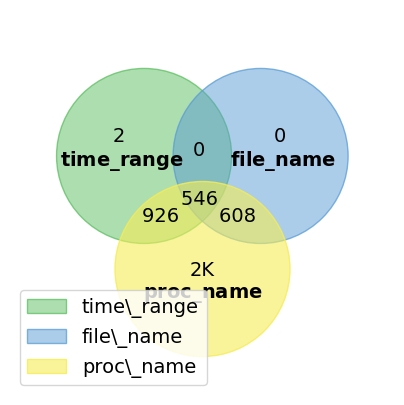

time: 974 ms (started: 2023-12-24 16:44:49 -08:00)


In [9]:
result.plots.view_relations3(
    metric='time',
    view_key1=('time_range',),
    view_key2=('file_name',),
    view_key3=('proc_name',),
)

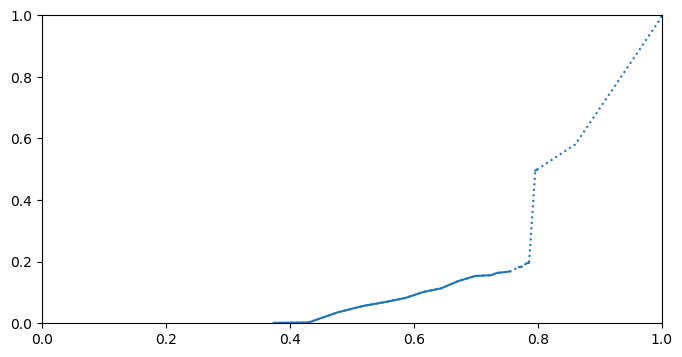

time: 262 ms (started: 2023-12-24 16:44:50 -08:00)


In [10]:
fig, ax = result.plots.slope(
    figsize=(8, 4),
    metric='time',
    view_keys=[('time_range',)],
)